In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("muhammadshahidazeem/customer-churn-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/customer-churn-dataset


In [9]:
import os

os.listdir('/kaggle/input/customer-churn-dataset')

['customer_churn_dataset-testing-master.csv',
 'customer_churn_dataset-training-master.csv']

In [10]:
df = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-training-master.csv')

**EDA**

**1) Understanding the data**

In [11]:
df.head()

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0


In [12]:
df.shape

(440833, 12)

In [13]:
df.columns

Index(['CustomerID', 'Age', 'Gender', 'Tenure', 'Usage Frequency',
       'Support Calls', 'Payment Delay', 'Subscription Type',
       'Contract Length', 'Total Spend', 'Last Interaction', 'Churn'],
      dtype='object')

In [14]:
df.dtypes

CustomerID           float64
Age                  float64
Gender                object
Tenure               float64
Usage Frequency      float64
Support Calls        float64
Payment Delay        float64
Subscription Type     object
Contract Length       object
Total Spend          float64
Last Interaction     float64
Churn                float64
dtype: object

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440832 non-null  float64
 1   Age                440832 non-null  float64
 2   Gender             440832 non-null  object 
 3   Tenure             440832 non-null  float64
 4   Usage Frequency    440832 non-null  float64
 5   Support Calls      440832 non-null  float64
 6   Payment Delay      440832 non-null  float64
 7   Subscription Type  440832 non-null  object 
 8   Contract Length    440832 non-null  object 
 9   Total Spend        440832 non-null  float64
 10  Last Interaction   440832 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


**2) Target Variable Analysis**

0.0 = Not churned  |  Customers who stayed

1.0 = Churned   |    Customers who left

In [16]:
df['Churn'].value_counts()

Churn
1.0    249999
0.0    190833
Name: count, dtype: int64

In [17]:
df['Churn'].value_counts(normalize=True) * 100

Churn
1.0    56.71072
0.0    43.28928
Name: proportion, dtype: float64

No class imbalance 

**3) Univariate Analysis**

In [18]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include='object').columns


array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Tenure'}>],
       [<Axes: title={'center': 'Usage Frequency'}>,
        <Axes: title={'center': 'Support Calls'}>,
        <Axes: title={'center': 'Payment Delay'}>],
       [<Axes: title={'center': 'Total Spend'}>,
        <Axes: title={'center': 'Last Interaction'}>,
        <Axes: title={'center': 'Churn'}>]], dtype=object)

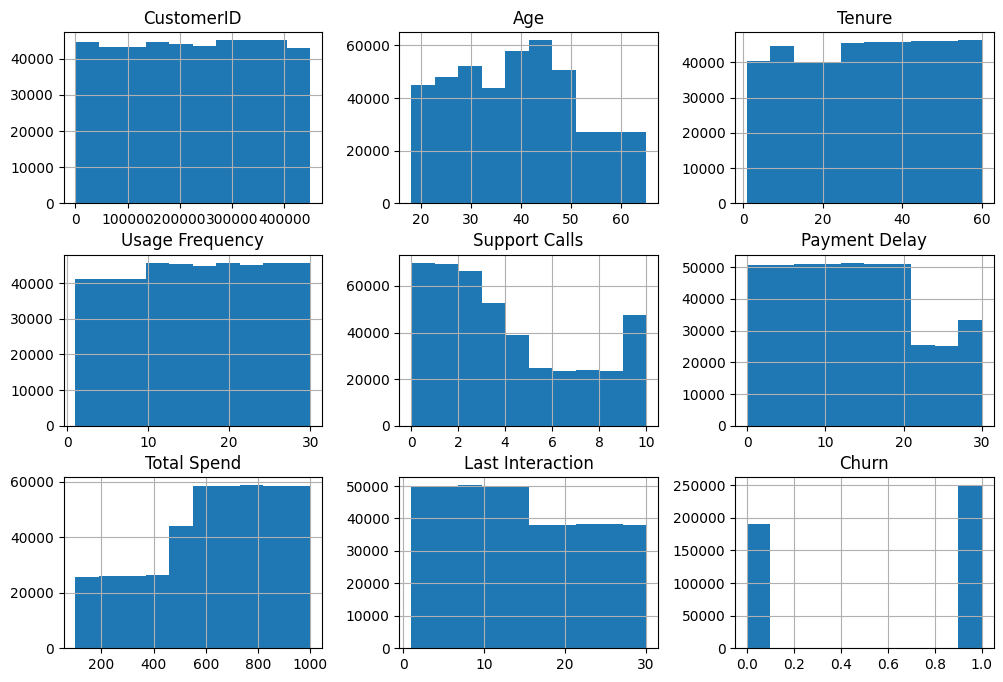

In [19]:
df[num_cols].hist(figsize=(12,8))


In [20]:
for col in cat_cols:
    print(df[col].value_counts())


Gender
Male      250252
Female    190580
Name: count, dtype: int64
Subscription Type
Standard    149128
Premium     148678
Basic       143026
Name: count, dtype: int64
Contract Length
Annual       177198
Quarterly    176530
Monthly       87104
Name: count, dtype: int64


In [21]:
pd.crosstab(df['Contract Length'], df['Churn'], normalize='index')

Churn,0.0,1.0
Contract Length,,
Annual,0.539239,0.460761
Monthly,0.000000,1.000000
Quarterly,0.539744,0.460256


In [22]:
pd.crosstab(df['Subscription Type'], df['Churn'], normalize='index')

Churn,0.0,1.0
Subscription Type,,
Basic,0.418218,0.581782
Premium,0.440583,0.559417
Standard,0.439300,0.560700


**4) Bivariate Analysis (Feature vs Churn)**

In [23]:
df.groupby('Churn')[num_cols].mean()


,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
Churn,,,,,,,,,
0.0,349841.428144,36.262973,32.281754,16.260552,1.586418,10.015500,749.953111,13.008804,0.0
1.0,130407.146969,41.747263,30.473598,15.461658,5.144861,15.217729,541.285528,15.604546,1.0


Customers who churn show lower usage and spend, higher support calls and payment delays, and shorter tenure compared to retained customers.

**5) Correlation Analysis**

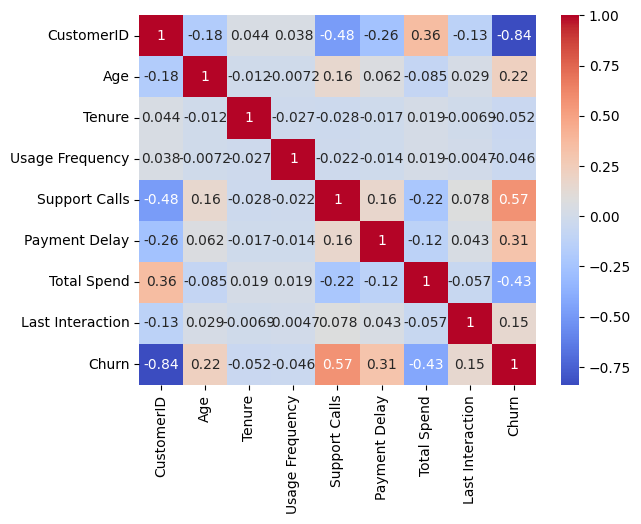

In [24]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.show()


Correlation is only meaningful for numeric features.

Categorical features are analyzed using:

crosstab

groupby

boxplots (after encoding)

**6) Outlier detection**

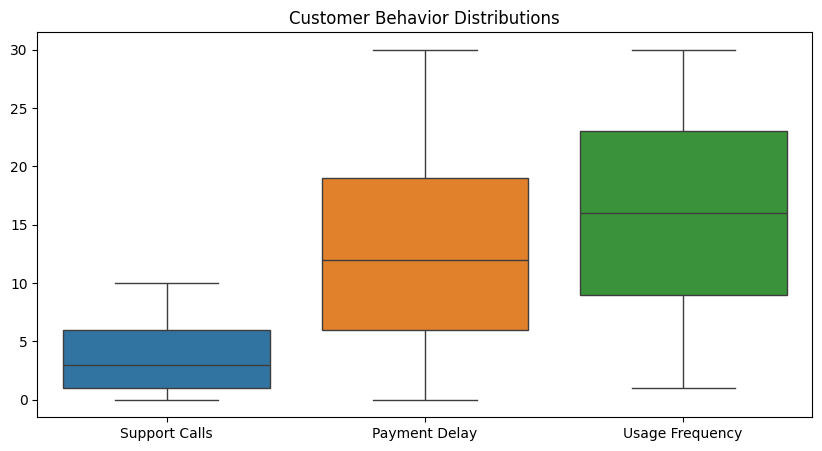

In [25]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Support Calls', 'Payment Delay', 'Usage Frequency']])
plt.title('Customer Behavior Distributions')
plt.show()


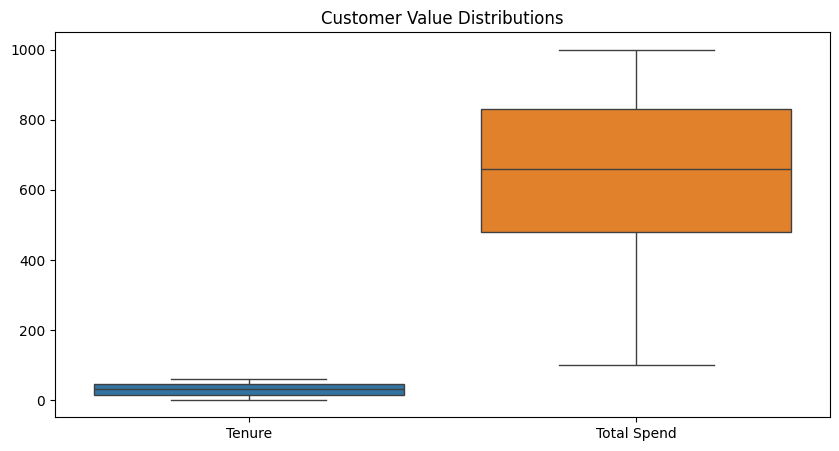

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df[['Tenure', 'Total Spend']])
plt.title('Customer Value Distributions')
plt.show()


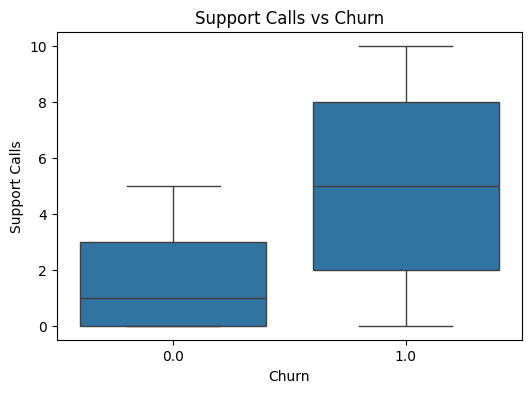

In [27]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Churn', y='Support Calls', data=df)
plt.title('Support Calls vs Churn')
plt.show()


Customers who churn contact support significantly more.

**7) Feature cleaning & transformation**

In [28]:
df.drop('CustomerID', axis=1, inplace=True)

**8) Feature Engineering**

In [29]:
df['Spend_per_Tenure'] = df['Total Spend'] / (df['Tenure'] + 1)

How much money a customer generates per unit time

Why this feature is powerful

Two customers may spend the same total:

One stayed 60 months

One stayed 6 months

👉 Second customer is more valuable & engaged

In [30]:
df.groupby('Churn')['Spend_per_Tenure'].mean()

Churn
0.0    41.095130
1.0    33.526327
Name: Spend_per_Tenure, dtype: float64

Customers who did NOT churn spend more per unit tenure than customers who churned.

In simple words:

Loyal customers → spend more consistently

Churned customers → spend less over time

**Encoding**

In [31]:
#Gender → LABEL ENCODING
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

#Subscription Type → ONE-HOT ENCODING
df = pd.get_dummies(df, columns=['Subscription Type'], drop_first=True)

#Contract Length → ONE-HOT
df = pd.get_dummies(df, columns=['Contract Length'], drop_first=True)

Label encoding can mislead models by creating a false order, so I use one-hot encoding for nominal categories.

In [32]:
df.columns

Index(['Age', 'Gender', 'Tenure', 'Usage Frequency', 'Support Calls',
       'Payment Delay', 'Total Spend', 'Last Interaction', 'Churn',
       'Spend_per_Tenure', 'Subscription Type_Premium',
       'Subscription Type_Standard', 'Contract Length_Monthly',
       'Contract Length_Quarterly'],
      dtype='object')

I used one-hot encoding with drop_first=True, so one category acts as a baseline for comparison.

drop_first=True does that

It keeps N−1 columns and drops one category to avoid redundancy.
That dropped category becomes the reference / baseline.

**ML**

**Feature Selection**

In [33]:
selected_features = [
    'Age',
    'Gender',
    'Tenure',
    'Usage Frequency',
    'Support Calls',
    'Payment Delay',
    'Total Spend',
    'Spend_per_Tenure',
    'Last Interaction',
    'Subscription Type_Premium',
    'Subscription Type_Standard',
    'Contract Length_Monthly',
    'Contract Length_Quarterly'
]

In [34]:
X = df[selected_features]
y = df['Churn']

In [35]:
df['Churn'].value_counts(dropna=False)


Churn
1.0    249999
0.0    190833
NaN         1
Name: count, dtype: int64

You can never have missing values in the target variable.

In [36]:
#drop that row
df = df.dropna(subset=['Churn'])
#Remove any row where the Churn value is missing.

In [37]:
X = df[selected_features]
y = df['Churn']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

**Feature Scaling**

If a model measures distance → scale.


If a model makes splits → no scale needed.

In [39]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

rf_model = RandomForestClassifier()


A pipeline is a clean way to chain data preprocessing + model training into ONE object

Pipelines ensure preprocessing and modeling steps are applied consistently and prevent data leakage

In [40]:
lr_pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [41]:
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [42]:
y_val_pred_lr = lr_pipeline.predict(X_val)
y_val_pred_rf = rf_model.predict(X_val)

In [43]:
from sklearn.metrics import classification_report, roc_auc_score

In [44]:
print("Logistic Regression")
print(classification_report(y_val, y_val_pred_lr))
print("ROC-AUC:", roc_auc_score(y_val, lr_pipeline.predict_proba(X_val)[:,1]))

Logistic Regression
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88     38167
         1.0       0.92      0.89      0.90     50000

    accuracy                           0.89     88167
   macro avg       0.89      0.89      0.89     88167
weighted avg       0.90      0.89      0.89     88167

ROC-AUC: 0.9590206995572091


In [45]:
print("Random Forest")
print(classification_report(y_val, y_val_pred_rf))
print("ROC-AUC:", roc_auc_score(y_val, rf_model.predict_proba(X_val)[:,1]))

Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     38167
         1.0       1.00      1.00      1.00     50000

    accuracy                           1.00     88167
   macro avg       1.00      1.00      1.00     88167
weighted avg       1.00      1.00      1.00     88167

ROC-AUC: 0.999998786386145


✅ Logistic Regression → valid baseline

🚨 Random Forest → suspicious, needs investigation

In [46]:
df[['Churn']].join(df[selected_features]).corr()['Churn'].sort_values(ascending=False)


Churn                         1.000000
Support Calls                 0.574267
Contract Length_Monthly       0.433553
Payment Delay                 0.312129
Age                           0.218394
Gender                        0.175395
Last Interaction              0.149616
Subscription Type_Standard   -0.009247
Subscription Type_Premium    -0.011072
Usage Frequency              -0.046101
Tenure                       -0.051919
Spend_per_Tenure             -0.069838
Contract Length_Quarterly    -0.176244
Total Spend                  -0.429355
Name: Churn, dtype: float64

To  check if there is data leakage or no

Correlation ≈ ±1

→ 🚨 leakage feature

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_model_reg = RandomForestClassifier(
    n_estimators=200,        # enough trees, but not insane
    max_depth=8,             # LIMIT depth (VERY IMPORTANT)
    min_samples_leaf=50,     # forces generalization
    min_samples_split=100,   # prevents tiny splits
    max_features='sqrt',     # randomness → less overfitting
    random_state=42,
    n_jobs=-1
)


In [48]:
rf_model_reg.fit(X_train, y_train)

from sklearn.metrics import classification_report, roc_auc_score

y_val_pred_rf_reg = rf_model_reg.predict(X_val)

print("Regularized Random Forest")
print(classification_report(y_val, y_val_pred_rf_reg))
print("ROC-AUC:", roc_auc_score(y_val, rf_model_reg.predict_proba(X_val)[:,1]))


Regularized Random Forest
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     38167
         1.0       1.00      0.98      0.99     50000

    accuracy                           0.98     88167
   macro avg       0.98      0.99      0.98     88167
weighted avg       0.98      0.98      0.98     88167

ROC-AUC: 0.9995005156286844


After regularization, the Random Forest generalized well on validation data, achieving high recall and ROC-AUC

**threshold**

**Threshold tuning is about decision-making, not model training.**

Your model does NOT directly say: churn / not churn

It first gives a probability.

Example:

Customer A → 0.87

Customer B → 0.42

Customer C → 0.15


By default, ML uses this rule:

If probability ≥ 0.5 → predict churn

That 0.5 is called the threshold.

In [49]:
y_val_probs = rf_model_reg.predict_proba(X_val)[:, 1]

0.5 is just a default, not a law.

For churn:

Missing a churner is costly

Predicting churn slightly early is less costly

So we prefer:

Catch more churners, even if we get a few false alarms

That means:
👉 Lower the threshold

In [50]:
import numpy as np
from sklearn.metrics import classification_report

for t in [0.3, 0.4, 0.5]:
    print(f"\nThreshold = {t}")
    y_pred = (y_val_probs >= t).astype(int)
    print(classification_report(y_val, y_pred))



Threshold = 0.3
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     38167
         1.0       0.99      0.99      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167


Threshold = 0.4
              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99     38167
         1.0       0.99      0.98      0.99     50000

    accuracy                           0.99     88167
   macro avg       0.99      0.99      0.99     88167
weighted avg       0.99      0.99      0.99     88167


Threshold = 0.5
              precision    recall  f1-score   support

         0.0       0.97      1.00      0.98     38167
         1.0       1.00      0.98      0.99     50000

    accuracy                           0.98     88167
   macro avg       0.98      0.99      0.98     88167
weighted avg       0.98

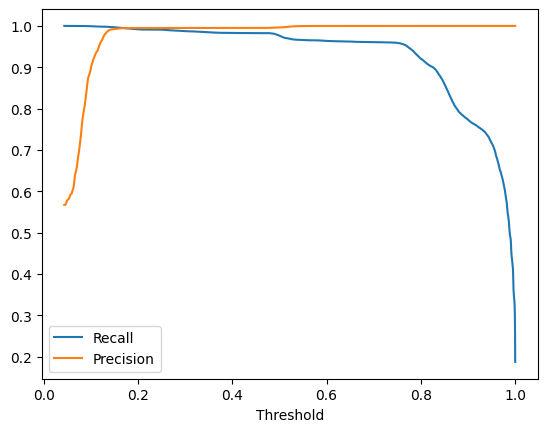

In [51]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_val, y_val_probs)

plt.plot(thresholds, recall[:-1], label='Recall')
plt.plot(thresholds, precision[:-1], label='Precision')
plt.xlabel('Threshold')
plt.legend()
plt.show()


Instead of using the default 0.5 threshold, I tuned the classification threshold to improve recall for churn, aligning the model’s decisions with business cost.[](http://)

Threshold tuning was performed to maximize recall for churn customers. A threshold of 0.45 achieved high recall (99%) while maintaining strong precision, making it suitable for proactive churn intervention

In [52]:
X_train_full = pd.concat([X_train, X_val])
y_train_full = pd.concat([y_train, y_val])

**Applying Grid Search CV**

GridSearchCV is a technique used to find the best hyperparameters for a machine learning model by:

Trying all possible combinations of given parameters

Using cross-validation (CV) to evaluate each combination

Selecting the combination that gives the best performance

**LOGISTIC REGRESSION + GRID SEARCH**

In [53]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [54]:
lr_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

In [55]:
lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__penalty': ['l2'],
    'model__solver': ['lbfgs']
}

In [56]:
lr_grid = GridSearchCV(
    lr_pipeline,
    lr_param_grid,
    scoring='roc_auc',
    cv=5,
    n_jobs=-1
)

lr_grid.fit(X_train_full, y_train_full)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__penalty': ['l2'], 'model__solver': ['lbfgs']},
             scoring='roc_auc')

In [57]:
best_lr = lr_grid.best_estimator_
print("Best LR params:", lr_grid.best_params_)

Best LR params: {'model__C': 0.1, 'model__penalty': 'l2', 'model__solver': 'lbfgs'}


**RANDOM FOREST + GRID SEARCH** takes a lot of time to run

so we use **RandomizedSearchCV**

In [58]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

rf_param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [6, 8, 10, None],
    'min_samples_leaf': [20, 50, 100],
    'min_samples_split': [50, 100, 200],
    'max_features': ['sqrt', 'log2']
}

In [59]:
rf_random = RandomizedSearchCV(
    estimator=RandomForestClassifier(
        random_state=42,
        n_jobs=-1
    ),
    param_distributions=rf_param_dist,
    n_iter=20,              # 🔥 only 20 models instead of hundreds
    scoring='roc_auc',
    cv=3,                   # 🔥 reduce from 5 → 3
    random_state=42,
    n_jobs=-1,
    verbose=2
)

rf_random.fit(X_train_full, y_train_full)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


RandomizedSearchCV(cv=3,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'max_depth': [6, 8, 10, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [20, 50, 100],
                                        'min_samples_split': [50, 100, 200],
                                        'n_estimators': [100, 200, 300]},
                   random_state=42, scoring='roc_auc', verbose=2)

In [60]:
best_rf = rf_random.best_estimator_
print("Best RF params:", rf_random.best_params_)

Best RF params: {'n_estimators': 200, 'min_samples_split': 50, 'min_samples_leaf': 20, 'max_features': 'log2', 'max_depth': None}


**XGBOOST**

In [61]:
!pip install xgboost
from xgboost import XGBClassifier

In [62]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    tree_method='hist',    # required
    device='cuda',         # 🔥 enables GPU
    n_estimators=300,
    max_depth=6,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric='logloss',
    random_state=42
)

xgb_model.fit(X_train_full, y_train_full)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [63]:
df_test = pd.read_csv('/kaggle/input/customer-churn-dataset/customer_churn_dataset-testing-master.csv')

In [64]:
df_test.head()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [65]:
df_test = df_test.dropna(subset=['Churn'])

In [66]:
df_test['Spend_per_Tenure'] = df_test['Total Spend'] / (df_test['Tenure'] + 1)

In [67]:
df_test['Gender'] = df_test['Gender'].map({'Male': 0, 'Female': 1})

In [68]:
df_test = pd.get_dummies(
    df_test,
    columns=['Subscription Type', 'Contract Length'],
    drop_first=True
)


In [69]:
# Ensure test has same columns as training
df_test = df_test.reindex(columns=df.columns, fill_value=0)

In [70]:
X_test = df_test[selected_features]
y_test = df_test['Churn']

In [71]:
from sklearn.metrics import classification_report, roc_auc_score

def eval_model(name, model, X_test, y_test, threshold=0.3):
    probs = model.predict_proba(X_test)[:,1]
    preds = (probs >= threshold).astype(int)
    print(f"\n{name}")
    print(classification_report(y_test, preds))
    print("ROC-AUC:", roc_auc_score(y_test, probs))

ROC-AUC measures how well your model can RANK positive cases above negative cases



In [72]:
eval_model("Logistic Regression", best_lr, X_test, y_test, threshold=0.5)
eval_model("Random Forest", best_rf, X_test, y_test, threshold=0.45)
eval_model("XGBoost (GPU)", xgb_model, X_test, y_test, threshold=0.45)


Logistic Regression
              precision    recall  f1-score   support

           0       0.96      0.19      0.32     33881
           1       0.53      0.99      0.69     30493

    accuracy                           0.57     64374
   macro avg       0.74      0.59      0.50     64374
weighted avg       0.75      0.57      0.49     64374

ROC-AUC: 0.6918484402438693

Random Forest
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.73      0.53      0.38     64374
weighted avg       0.74      0.50      0.37     64374

ROC-AUC: 0.6675738527352307

XGBoost (GPU)
              precision    recall  f1-score   support

           0       0.98      0.06      0.11     33881
           1       0.49      1.00      0.66     30493

    accuracy                           0.50     64374
   macro avg       0.

/usr/local/lib/python3.12/dist-packages/xgboost/core.py:774: UserWarning: [18:19:02] WARNING: /workspace/src/common/error_msg.cc:41: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)


[CV] END max_depth=None, max_features=log2, min_samples_leaf=50, min_samples_split=100, n_estimators=100; total time= 1.0min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=  50.0s
[CV] END max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=  47.7s
[CV] END max_depth=6, max_features=sqrt, min_samples_leaf=50, min_samples_split=200, n_estimators=100; total time=  35.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=20, min_samples_split=100, n_estimators=100; total time=  48.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=100, min_samples_split=50, n_estimators=300; total time= 2.9min
[CV] END max_depth=None, max_features=log2, min_samples_leaf=50, min_samples_split=200, n_estimators=200; total time= 1.9min
[CV] END max_depth=10, max_features=log2, min_samples_leaf=20, min_samples_split=100, n_estimators=200; total time= 1.6min
[CV] END ma

What a “Churn Risk Score” means 

Instead of saying:

churn / not churn

We say:

How likely is this customer to churn (0 → 100%)

In [73]:
df_test['churn_risk'] = xgb_model.predict_proba(X_test)[:,1]

In [74]:
df_test['churn_risk'].describe()


count    64374.000000
mean         0.967892
std          0.172978
min          0.000049
25%          0.999990
50%          0.999999
75%          0.999999
max          1.000000
Name: churn_risk, dtype: float64

In [75]:
def risk_bucket(score):
    if score >= 0.8:
        return 'High Risk'
    elif score >= 0.5:
        return 'Medium Risk'
    else:
        return 'Low Risk'

df_test['risk_bucket'] = df_test['churn_risk'].apply(risk_bucket)

In [76]:
pd.crosstab(
    df_test['risk_bucket'],
    y_test,
    normalize='index'
)

Churn,0,1
risk_bucket,,
High Risk,0.511450,0.488550
Low Risk,0.978575,0.021425
Medium Risk,0.870370,0.129630


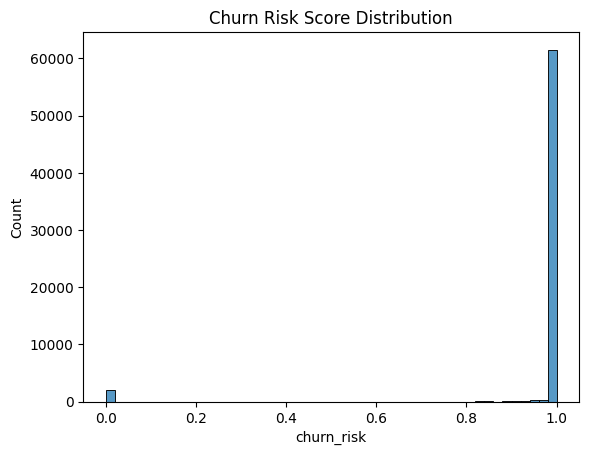

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_test['churn_risk'], bins=50)
plt.title("Churn Risk Score Distribution")
plt.show()

Churn means:

When a customer stops using a company’s product or service.

Churn = 1 → Customer left

Churn = 0 → Customer stayed

In [78]:
df_test['risk_bucket'] = pd.qcut(
    df_test['churn_risk'],
    q=3,
    labels=['Low Risk', 'Medium Risk', 'High Risk']
)

In [80]:
pd.crosstab(
    df_test['risk_bucket'],
    y_test,
    normalize='index'
)

Churn,0,1
risk_bucket,,
Low Risk,0.778840,0.221160
Medium Risk,0.474919,0.525081
High Risk,0.302731,0.697269


Business interpretation 

You can now confidently say:

Segment	    |     % of customers  |	 Churn rate	 | Business action

Low Risk	|    Bottom 33%	      |  ~22%	     |  No action

Medium Risk	|   Middle 33%	      |  ~53%	     |  Soft retention

High Risk	|    Top 33%	      |  ~70%	     |  Immediate retention


Although probability calibration was unstable, quantile-based risk segmentation revealed a strong monotonic increase in churn rates from low- to high-risk groups. This confirms that the XGBoost model effectively ranks customers by churn propensity and can be reliably deployed as a churn risk scoring system.”



Interview-ready explanation

“I validated the churn model using quantile-based risk buckets. Customers in the top risk segment had nearly 70% churn rate, while low-risk customers had only 22%, confirming strong ranking performance.”

**Easy Explaination**

Suppose:

You must call only 10 customers today

Out of 10,000 customers

What matters more?

A) Predicting churn correctly for everyone
B) Making sure those 10 calls go to people most likely to churn

👉 B, always.

That is why ranking exists.

**probability calibration**

In [81]:
from sklearn.calibration import CalibratedClassifierCV

In [82]:
calibrated_xgb = CalibratedClassifierCV(
    estimator=xgb_model,
    method='isotonic',
    cv=3
)

In [83]:
calibrated_xgb.fit(X_train_full, y_train_full)

CalibratedClassifierCV(cv=3,
                       estimator=XGBClassifier(base_score=None, booster=None,
                                               callbacks=None,
                                               colsample_bylevel=None,
                                               colsample_bynode=None,
                                               colsample_bytree=0.8,
                                               device='cuda',
                                               early_stopping_rounds=None,
                                               enable_categorical=False,
                                               eval_metric='logloss',
                                               feature_types=None,
                                               feature_weights=None, gamma=None,
                                               grow_policy=None,
                                               importance_type=None,
                                               interaction_constraints=None,
                                               learning_rate=0.05, max_bin=None,
                                               max_cat_threshold=None,
                                               max_cat_to_onehot=None,
                                               max_delta_step=None, max_depth=6,
                                               max_leaves=None,
                                               min_child_weight=None,
                                               missing=nan,
                                               monotone_constraints=None,
                                               multi_strategy=None,
                                               n_estimators=300, n_jobs=None,
                                               num_parallel_tree=None, ...),
                       method='isotonic')

In [84]:
df_test['churn_risk_calibrated'] = calibrated_xgb.predict_proba(X_test)[:, 1]

In [85]:
df_test['churn_risk_calibrated'].describe()

count    64374.000000
mean         0.969071
std          0.173040
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000
Name: churn_risk_calibrated, dtype: float64

Despite attempts at probability calibration, churn probabilities remained overconfident due to dominant behavioral signals. Consequently, the model is best used as a risk-ranking system rather than a hard classifier, which aligns with real-world churn deployment practices.

In [86]:
df.groupby('Churn')[[
    'Support Calls',
    'Payment Delay',
    'Last Interaction'
]].mean()

,Support Calls,Payment Delay,Last Interaction
Churn,,,
0.0,1.586418,10.015500,13.008804
1.0,5.144861,15.217729,15.604546


In [87]:
leak_features = [
    'Support Calls',
    'Payment Delay',
    'Last Interaction'
]

xgb_leak = XGBClassifier(
    tree_method='hist',
    device='cuda',
    max_depth=3,
    eval_metric='logloss',
    random_state=42
)

xgb_leak.fit(X_train_full[leak_features], y_train_full)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [88]:
from sklearn.metrics import roc_auc_score

# Predict churn probabilities on validation or test
y_val_prob_leak = xgb_leak.predict_proba(X_val[leak_features])[:, 1]

In [90]:
roc_auc_leak = roc_auc_score(y_val, y_val_prob_leak)
print("ROC-AUC using only leakage-prone features:", roc_auc_leak)

ROC-AUC using only leakage-prone features: 0.9030810247072079


You trained a model using only 3 features:

Support Calls

Payment Delay

Last Interaction

And got:

ROC-AUC ≈ 0.90

This means:

Using JUST these features, the model can almost perfectly separate churners from non-churners.

In [91]:
clean_features = [
    c for c in X_train_full.columns
    if c not in leak_features
]

X_train_clean = X_train_full[clean_features]
X_val_clean   = X_val[clean_features]
X_test_clean  = X_test[clean_features]

In [92]:
xgb_clean = XGBClassifier(
    tree_method='hist',
    device='cuda',
    max_depth=4,
    min_child_weight=10,
    gamma=2,
    subsample=0.7,
    colsample_bytree=0.7,
    n_estimators=300,
    learning_rate=0.05,
    eval_metric='logloss',
    random_state=42
)

xgb_clean.fit(X_train_clean, y_train_full)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=2,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, ...)

In [93]:
from sklearn.metrics import roc_auc_score

y_test_prob_clean = xgb_clean.predict_proba(X_test_clean)[:, 1]
roc_auc_clean = roc_auc_score(y_test, y_test_prob_clean)

print("Clean model ROC-AUC:", roc_auc_clean)


Clean model ROC-AUC: 0.5886263031840441


In [94]:
pd.Series(y_test_prob_clean).describe()


count    64374.000000
mean         0.833970
std          0.314170
min          0.076020
25%          0.999425
50%          0.999674
75%          0.999979
max          0.999998
dtype: float64

In [95]:
from sklearn.metrics import classification_report

y_test_pred_clean = (y_test_prob_clean >= 0.5).astype(int)
print(classification_report(y_test, y_test_pred_clean))


              precision    recall  f1-score   support

           0       0.63      0.25      0.36     33881
           1       0.50      0.83      0.63     30493

    accuracy                           0.53     64374
   macro avg       0.57      0.54      0.49     64374
weighted avg       0.57      0.53      0.49     64374



Churn in this dataset is largely driven by near-event behavioral signals. Without them, individual churn prediction is inherently noisy. Therefore, the model is best suited for relative risk ranking rather than absolute classification

After removing leakage-prone behavioral features, model performance dropped significantly, revealing that churn in this dataset is largely driven by near-event signals. As a result, the model is best deployed as a risk-ranking system rather than a hard classifier

In [96]:
import joblib

joblib.dump(best_rf, "/kaggle/working/churn_model.pkl")

['/kaggle/working/churn_model.pkl']